In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore",message = "x does not have valid feature names")

In [12]:
#dataset
data = {
    'Age' : [15,21,25,26,21,27,30,32,33,35,37,38,40,43,45,46,55,56,57,59],
    'Salary' : [5000,30000,32000,36000,34000,40000,55000,50000,52000,64000,60000,70000,73000,72000,70000,73000,72000,78000,79000,80000],
    'Purchase' : [0,0,1,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,0,0]
}
df = pd.DataFrame(data)
print(df)

    Age  Salary  Purchase
0    15    5000         0
1    21   30000         0
2    25   32000         1
3    26   36000         0
4    21   34000         0
5    27   40000         0
6    30   55000         1
7    32   50000         0
8    33   52000         1
9    35   64000         1
10   37   60000         0
11   38   70000         1
12   40   73000         1
13   43   72000         1
14   45   70000         1
15   46   73000         1
16   55   72000         0
17   56   78000         1
18   57   79000         0
19   59   80000         0


In [13]:
x = df[['Age', 'Salary']]  #Independent variable
y = df['Purchase'] #dependent variable

In [14]:
#Train - test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred = model.predict(x_test)
print("Test Data \n",x_test)
print("Actual Values",y_test.values)
print("Predicted Values",y_pred)

Test Data 
     Age  Salary
18   57   79000
1    21   30000
19   59   80000
8    33   52000
10   37   60000
17   56   78000
Actual Values [0 0 0 1 0 1]
Predicted Values [1 0 0 1 1 1]


In [16]:
#for example- prediction for a new sample
new_data = np.array([[20,20000]]) #age = 20, salary = 20000
prediction = model.predict(new_data)
print("Predicted class (0=no, 1=yes)",prediction[0])

Predicted class (0=no, 1=yes) 0


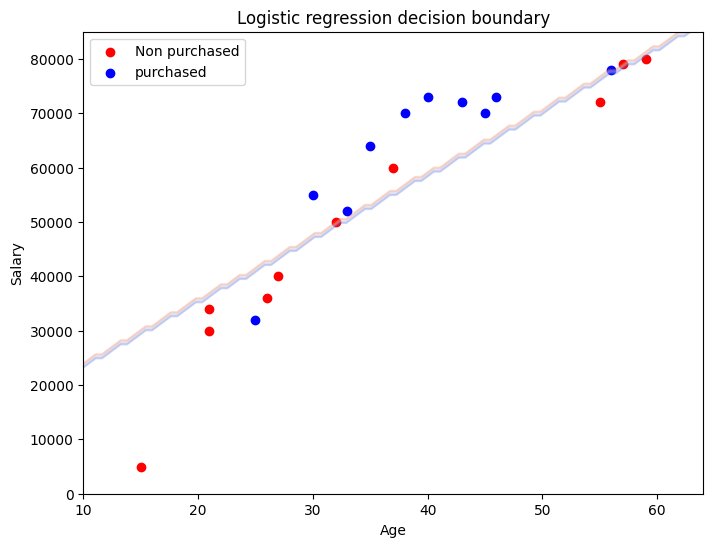

In [20]:
#visualization

#sacatter plot for actual data
plt.figure(figsize=(8,6))
plt.scatter(df[df['Purchase']==0]['Age'], df[df['Purchase']==0]['Salary'], color = 'red',label='Non purchased') 
plt.scatter(df[df['Purchase']==1]['Age'], df[df['Purchase']==1]['Salary'], color = 'blue',label='purchased') 
# Decision boundary visualization
x_min, x_max = x['Age'].min()-5, x['Age'].max()+5
y_min, y_max = x['Salary'].min()-5000, x['Salary'].max()+5000
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx,yy,z,alpha=0.2,cmap='coolwarm')
#the coutourf() function is the key to visualization decision boundaries
#in classification models like logistic regression
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Logistic regression decision boundary')
plt.legend()
plt.show()